In [131]:
import timer
import csv
import pandas as pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import string
import operator
from itertools import islice
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import time

sns.set_style('white')

In [135]:
df = pd.read_csv('data/estrategias_reclutamiento_nnaj_verified.csv', sep=';', encoding = 'latin-1')
df.head(1)

,Filename,Year,Departamento,NNAJ,estrategia,estrategia_list_clean
0,"AT N° 003-18 NAR-Cumbitara, Maguí Payán, Policarpa y Roberto Payán.pdf",2018,Nariño,"['Por lo anterior; desde el Sistema de Alertas Tempranas, advertimos ante la inminencia de violacion masivas a los derechos humanos e infracciones al DIH como amenazas, asesinatos selectivos, desplazamientos individuales, reclutamientos forzados y utilización ilícita de **niños**, niñas y adolescentes, desplazamientos masivos, restricciones a la movilidad, desaparición forzada, confinamientos, combates con interposición de la población civil, ataques indiscriminados, entre otras.', 'RECOMENDACIONES A la Secretaria Técnica de la CIPRAT, inicié el seguimiento del impacto de las medidas adoptadas y a la continuidad del riesgo, y en coordinación con la Gobernación de Nariño y las alcaldías municipales de Policarpa, Cumbitara, Magüí Payán y Roberto Payán convoque a la instancia territorial o instancias territoriales con este mismo propósito, teniendo en cuenta el enfoque territorial, diferencial étnico y de género establecidos en el decreto 2<1,24 a 017, con el fin de promover y adoptar medidas efectivas de protección ante nuevas s·tuacion s de riesgo y amenaza contra la población civil, especialmente, a favor de líderes sociale ujetos de especial protección constitucional como **niños**, niñas, adolescentes y j0v,e población en situación de desplazamiento forzado y otros grupos poblacionales en sit1:1 ci.é_n de riesgo.', 'A la Comisión lntersectorial para la prevención del reclutamiento y la utilización de **niños**, niñas, adolescentes y jóvenes por grupos armados ilegales para que con el co1KllfS de las instancias que conforman el Sistema Nacional de Bienestar Familiar, o dinen las acciones necesarias, en términos de políticas y estrategias para prevenir el r -ecluta;niento forzado de **niños**, niñas, adolescentes y jóvenes por parte de actores ar atlas ·legales en las zonas rurales de los municipios de Policarpa, Cumbitara, Magüí PaY,áfl y · alerto Payán.']",forzada,['reclutamiento forzado']


In [141]:
dict_estrategias = {'violencia' : ['acciones ejmplarizantes', 'castigos ejemplarizantes', 'sembrar terror.',  
                                    'ejercicios de control social', 'acciones ejemplarizantes', 'asesinatos', 
                                   'asesinatos a lideres', 'asesinatos a nnaj', 'homicidio', 'masacre', 'lideres', 
                                   'perdida de familiares', 'asesinatos ejemplarizantes',
                                   'desplazamiento forzado'
                                    ], 
                    
                    'actividades lúdicas y recreativas' : [ 'actividades lúdicas y recreativas (fiestas', 
                                                           'campeonatos de futbol )',  'deportes', 'fiestas',
                                                           'fiestas clandestinas convocadas en redes sociales',
                                                          'patrocinio de equipos de deporte juveniles', 
                                                           'realización de actividades recreativas',
                                                          'actividades de deporte',
                                                           'actividades ludicas',
                                                           'actividades lúdicas y recreativas',
                                                          'amenazas a familia', 'actividades lúdicas',
                                                           'deporte', ],             
    
                    'presión' : [ 'presiones', 'presión', 'coacción', 'coaccion', 'coacción física y engaño', 
                                 'cohersion', 'cohersión', 'acoso', 'acecho', 'extorsion',  'intimidacion', 'intimmidacion',
                                 'amenazas', 'ameanza a familiares', 'ameanzas', 'ameanzas a familiares',  'ameanzas de muerte',  
                                 'amenaza', 'amenazas', 'amenazas a familiares', 'amenazas de muerte', 
                                 'amenazas en redes sociales', 'amenza',  'detencion', 'detencion arbitraria',
                                 'detenciones arbritrarias', 'patrullaje', 
                                 'prohibicion a mujeres de relaciones amorosas con la fuerza publica',
                                 'presion',
                                 'presiones familia',
                                 'presión',
                                 'pression', 'presion a las familias',
                                ], 
                    
                    'consumo de drogas' : [ 'consumo de drogas', 'consumo de sustancias', 
                                           'induccion al consumo de alcohol y drogas', 
                                           'induccion al consumo de drogas', 'iniciacion en el consumo de drogas', 
                                           'inicio consumo de drogas',  'instigacion al consumo de drogas',
                                           'intercambio de drogas por favores en beneficio de organizaciones criminales', 
                                           'induccion a consumo de drogas', 'droga', 
                                          ],

                    'regalos o promesas o protección': ['armas', 'dinero', 'drogas',  'falsas ofertas de trabajo', 'fascinacion por las armas',
                                'fascinación por las armas', 'engaño', 'engaños', 'mejoramiento del status', 'ofertas de dinero',
                                 'ofertas economicas',
                                 'ofrecimiento de ayuda economica a familias',
                                 'ofrecimiento de dinero',
                                 'ofrecimiento de empleo',
                                 'ofrecimiento de pagos',
                                 'ofrecimiento de pagos por actividades ilicitas o reclutamiento',
                                 'ofrecimiento de privilegios',
                                 'ofrecimiento de promesas y engaños',
                                 'ofrecimiento de reconocimiento y status social',
                                 'ofrecimiento de remuneracion por empleo',
                                 'ofrecimiento de salario',
                                 'ofrecimiento de status en el grupo',
                                 'ofrecimineto de pagos',
                                 'pago',
                                 'promesa de rpestigio',
                                 'promesas',
                                 'promesas de adquirir status dentro del grupo',
                                 'promesas de mejoramiento de la calidad de vida',
                                 'protección física',
                                 'regalos', 'regalos a comunidades vulnerables', 
                                'aumento del status',
                                'poder',
                                'oferta de trabajo',
                                'prestigio',
                                'promesas de beneficios',
                                'promesas de mejorar las condiciones de vida',
                                'oferta empleo',
                                'ofrecimiento de poder en la zona',
                                'beneficios',
                                'beneficios economicos', 'el ofrecimiento de dádivas',
                                'empleo',
                                'recompensas',
                                'regalos o pagos mensuales',
                                'salarios',
                                'financiacion de programas sociales', 
                                ],
                    
                    
                    'cuota familiar de reclutamiento' : [ 'cuota familiar', 'cuotas familiares', 'lealtad',  'cuotas comunitarias',],
                    
    
                    'vinculación sentimental/sexual' : [ 'relaciones sexuales y sentimentales con miembros del grupo armado',
                                                            'vinculacion sentimental o sexual con grupos armados',
                                                            'vinculacion sentimental o sexual con nnaj',
                                                            'vinculacion sentimental y sexual con jovenes de la zona',
                                                            'vinculacion sentimential o sexual con nnaj de la zona',
                                                            'vinculacion sexual o sentimental con miembros de grupos armados',
                                                            'vincularcion sentimental o sexual de grupos armados con nnaj',
                                                            'enamoramiento', 
                                                            'vinculacion sentimental',
                                                            'vinculación sentimental/sexual',], 
                    
                    'reclutamiento forzado' : ['forzada', 'forzado', 'reclutacmiento forzado', 'reclutamiento forzado',
                                               'forzaddo',
                                                 'forzados',
                                                 'frozado', 'sforzado', 'desaparición forzada' ,'desaparicion forzada', 'desapariciones forzadas',  'rehenes', 'secuestro', 'secuestros',
                                              'allanamiento de casas', 'confinamiento', 'desapariciones',
                                               'desaparición forzada',],
                    
                    'apoyo a actividades/bandas criminales' : [ 'instigacion a actividades criminales', 
                                                        'instrumentacion de las pandillas',
                                                         'instrumentalizacion de pandillas',
                                                         'instrumentazacion de pandillas',
                                                        'intrumentacion de bandas criminales',
                                                       'isntigacion a pandillas',
                                                       'vinculacion e instrumentalizacion en actividades criminales',
                                                       'apoyo delincuencia juvenil organizada',
                                                       'actividades criminales', 
                                                         'actividades de narcotrafico',
                                                         'actividades ilicita',
                                                         'actividades ilicitas',
                                                        'apoyo a actividades criminales',
                                                         'apoyo a actividades ilicitas',
                                                        'apoyo a bandas delincuenciales',
                                                        'bandas criminales',
                                                         'bandas delincuenciales',
                                                        'estructuras delincuenciales',
                                                        'grooming',
                                                        'induccion a actividades ilicitas',
                                                         'pandillas',
                                                               'actividades ilictas', 
                                                               
                                                       ], 
                    
                    'féminas como objetivo de reclutamiento/violencia' : [ 'mujeres como objetivo de',
                                                                         'mujeres como objetivo de violacion sexual',
                                                                         'mujeres como objetivo de violencia sexual',
                                                                         'mujeres objetivo militar de la guerrilla',
                                                                    'mujer',
                                                                     'mujer (tareas menores no en combate)',
                                                                     'mujer como objetivo',
                                                                     'mujeres',], 
                    
                    'penetración de centros educativos' : ['penetracion de centros educativos',
                                                          'penetracion de instituciones educativas',
                                                         'penetracion de instituciones educativas para vender drogas',
                                                         'penetracion de las instituciones educativas',
                                                         'penetracion en las escuelas',
                                                         'pentracion de las instituciones educativas',
                                                         'visitas a centros educativos con el fin de reclutar jovenes', 
                                                           'ataques a instalaciones educativas',
                                                           'escuelas',
                                                            'penetracion de las escuelas',
                                                           
                                                        ], 
                    'persuación de incorporación voluntaria y adoctrinamiento' : ["persuaci'on reclutamiento voluntario",
                                                                 'persuacion',
                                                                 'persuacion  de reclutamiento voluntario',
                                                                 'persuacion reclutamiento voluntario',
                                                                 'ppersuacion',
                                                                 'invitacion voluntaria',
                                                                'propaganda',  'reclutamiento inducido',
                                                                'reclutamiento voluntario',
                                                                 'reuniones de proselitismo ideológico',
                                                                'campañas de reclutamiento',
                                                                'acercamiento a poblacion nnaj',
                                                                'acercamiento', 
                                                                'voluntario', 
                                                                'adoctrinamiento', 
                                                                'adoctrinamiento (proteccion del barrio)', 
                                                                                  'adcotrinamiento', 'adoctrinamineto',
                                                                                  
                                                                ],                      

                   }

def replace_estrategia(text):
    for k in dict_estrategias.keys():
        if text in dict_estrategias[k]:
            return k
    return text
    
def clean_estrategias(strats):
    if str(strats) in ['nan','m', '']:
        return np.nan
    strats = strats.split(',')
    strats = [replace_estrategia(t.strip().lower()) for t in strats if replace_estrategia(t.strip().lower()) !='' ]
    #remove duplicates
    strats = list(set(strats))
    return strats

def get_list(df):
    df['estrategia_list_clean'] = df['estrategia'].apply(clean_estrategias)
    dt = df.explode('estrategia_list_clean')
    print(sorted([x for x in dt.estrategia_list_clean.unique() if str(x) not in ['nan', '']]))
    dt = dt.groupby('estrategia_list_clean')['Filename'].count().to_frame()
    return df, dt
ndf, gdf = get_list(df)

['actividades lúdicas y recreativas', 'apoyo a actividades/bandas criminales', 'consumo de drogas', 'cuota familiar de reclutamiento', 'féminas como objetivo de reclutamiento/violencia', 'missing', 'no data', 'penetración de centros educativos', 'persuación de incorporación voluntaria y adoctrinamiento', 'presión', 'reclutamiento forzado', 'regalos o promesas o protección', 'relaciones familiares y de parentezco', 'vinculación sentimental/sexual', 'violencia']


In [142]:
gdf = gdf[gdf.index != 'desplazamiento']
gdf = gdf[gdf.index != 'missing']

<Axes: ylabel='estrategia_list_clean'>

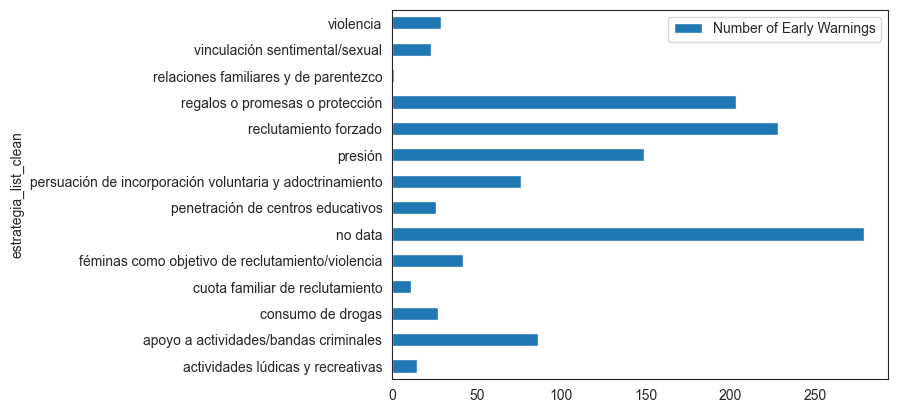

In [143]:
gdf.columns = ['Number of Early Warnings']
gdf.plot(kind='barh')

In [151]:
gdf

,Number of Early Warnings
estrategia_list_clean,
actividades lúdicas y recreativas,15
apoyo a actividades/bandas criminales,86
consumo de drogas,27
cuota familiar de reclutamiento,11
féminas como objetivo de reclutamiento/violencia,42
no data,279
penetración de centros educativos,26
persuación de incorporación voluntaria y adoctrinamiento,76
presión,149


In [144]:
ndf = ndf.explode('estrategia_list_clean')
ndf.head(1)

,Filename,Year,Departamento,NNAJ,estrategia,estrategia_list_clean
0,"AT N° 003-18 NAR-Cumbitara, Maguí Payán, Policarpa y Roberto Payán.pdf",2018,Nariño,"['Por lo anterior; desde el Sistema de Alertas Tempranas, advertimos ante la inminencia de violacion masivas a los derechos humanos e infracciones al DIH como amenazas, asesinatos selectivos, desplazamientos individuales, reclutamientos forzados y utilización ilícita de **niños**, niñas y adolescentes, desplazamientos masivos, restricciones a la movilidad, desaparición forzada, confinamientos, combates con interposición de la población civil, ataques indiscriminados, entre otras.', 'RECOMENDACIONES A la Secretaria Técnica de la CIPRAT, inicié el seguimiento del impacto de las medidas adoptadas y a la continuidad del riesgo, y en coordinación con la Gobernación de Nariño y las alcaldías municipales de Policarpa, Cumbitara, Magüí Payán y Roberto Payán convoque a la instancia territorial o instancias territoriales con este mismo propósito, teniendo en cuenta el enfoque territorial, diferencial étnico y de género establecidos en el decreto 2<1,24 a 017, con el fin de promover y adoptar medidas efectivas de protección ante nuevas s·tuacion s de riesgo y amenaza contra la población civil, especialmente, a favor de líderes sociale ujetos de especial protección constitucional como **niños**, niñas, adolescentes y j0v,e población en situación de desplazamiento forzado y otros grupos poblacionales en sit1:1 ci.é_n de riesgo.', 'A la Comisión lntersectorial para la prevención del reclutamiento y la utilización de **niños**, niñas, adolescentes y jóvenes por grupos armados ilegales para que con el co1KllfS de las instancias que conforman el Sistema Nacional de Bienestar Familiar, o dinen las acciones necesarias, en términos de políticas y estrategias para prevenir el r -ecluta;niento forzado de **niños**, niñas, adolescentes y jóvenes por parte de actores ar atlas ·legales en las zonas rurales de los municipios de Policarpa, Cumbitara, Magüí PaY,áfl y · alerto Payán.']",forzada,reclutamiento forzado


In [145]:
rndf = ndf[['Filename', 'Year', 'Departamento', 'estrategia_list_clean' ]]
rndf = rndf[rndf.estrategia_list_clean != 'no data']
rndf.to_csv('estrategias_explode.csv', sep=';', index=False)

In [146]:
actors = pd.read_csv("data/clean_NNAJ_Departaments_actors.csv", sep='|')
actors = actors[actors.categoria.notnull()]
actors = actors.groupby(['Filename', 'Year', 'categoria', 'Departamento']).nunique().reset_index()
actors = actors[['Filename', 'Year', 'Departamento', 'categoria']]
actors.head()

,Filename,Year,Departamento,categoria
0,AT N° 001-19 CAQ-San Vicente del Caguan y MET-La Macarena.pdf,2019,Meta,Guerrillas
1,AT N° 002-19 ANT-Valdivia.pdf,2019,Valle del Cauca,Guerrillas
2,AT N° 002-19 ANT-Valdivia.pdf,2019,Valle del Cauca,Nuevos Paramilitares (Narco-Para)
3,AT N° 002-2022 PUT-Puerto Leguízamo of.pdf,2022,Putumayo,Disidensias FARC
4,AT N° 002-2022 PUT-Puerto Leguízamo of.pdf,2022,Putumayo,Guerrillas


In [147]:
edges = pd.DataFrame(columns=['Source', 'Target', 'Weight', 'Year'])
nodes = pd.DataFrame(columns=['Id', 'Type'])
i = 0
j=0
for idx, row in ndf.iterrows():
    edges.loc[i] = [row['estrategia_list_clean'], row['Departamento'], 1, row['Year']]
    nodes.loc[j] = [ row['Departamento'], 'Departamento']
    nodes.loc[j + 1] = [ row['estrategia_list_clean'], 'Estrategia']
    i = i+1
    j = j+2

for idx, row in actors.iterrows():
    edges.loc[i] = [row['Departamento'], row['categoria'], 1, row['Year']]
    nodes.loc[j] = [ row['Departamento'], 'Departamento']
    nodes.loc[j + 1] = [ row['categoria'], 'Categoria']
    i = i+1
    j = j+2

edges.head()  

,Source,Target,Weight,Year
0,reclutamiento forzado,Nariño,1,2018
1,reclutamiento forzado,Nariño,1,2018
2,reclutamiento forzado,Córdoba,1,2018
3,regalos o promesas o protección,Córdoba,1,2018
4,vinculación sentimental/sexual,Córdoba,1,2018


In [148]:
edges = edges.groupby(['Source', 'Target',  'Year'])['Weight'].sum().to_frame().reset_index()
edges.sort_values('Weight', ascending =False)

,Source,Target,Year,Weight
16,Antioquia,Nuevos Paramilitares (Narco-Para),2018,6
333,Meta,Guerrillas,2012,6
338,Meta,Guerrillas,2018,5
182,Chocó,Guerrillas,2016,5
350,Meta,Paramilitares,2012,5
...,...,...,...,...
611,apoyo a actividades/bandas criminales,Nariño,2011,1
610,apoyo a actividades/bandas criminales,Nariño,2008,1
609,apoyo a actividades/bandas criminales,Meta,2018,1
608,apoyo a actividades/bandas criminales,Meta,2012,1


In [149]:
len(edges)

1497

In [150]:
edges.to_csv('data/edges_estrategias.csv', sep=";", index=False)
nodes.to_csv('data/nodes_estrategias.csv', sep=";", index=False)